# Forecasting Stocks using AI 

# Problem Statement

In a hypothetical world, you are an experienced stock market dealer whose goal is to leverage AI and algorithms to earn profits. During your research, you came across the internal workings' datasheet of TGD, which comprises three subsidiaries: TGD Consultancy, TGD Automobiles, and TGD Power.  You feel that these companies’ stock prices depend on this dataset, and there is also some interdependence between the stock prices of these three subsidiaries. To make informed decisions, you aim to study and analyze the dataset to forecast the values of TGD Consultancy, TGD Automobiles, and TGD Power share down the line. This will enable you to make timely buy and sell decisions, maximizing your profits. 

# Import Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
Train_Data = pd.read_excel("Train_Data.xlsx")
Train_Data.head()

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Automobiles Share price,TGD Power Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519,420,507
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518,420,507
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523,437,522
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522,437,522
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522,437,522


In [3]:
Train_Data_A = Train_Data.drop(columns=["TGD Automobiles Share price","TGD Power Share price"], axis=1)
Train_Data_A.head()

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522


In [4]:
Train_Data_B = Train_Data.drop(["TGD Consultancy Share price","TGD Power Share price"], axis= 1)
Train_Data_B.head()

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Automobiles Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,420
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,420
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,437
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,437
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,437


In [5]:
Train_Data_C = Train_Data.drop(["TGD Consultancy Share price","TGD Automobiles Share price"], axis= 1)
Train_Data_C.head()

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Power Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,507
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,507
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,522
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522


# Data Preprocessing

# EDA

In [6]:
Train_Data.shape

(161768, 18)

In [7]:
Train_Data_A.shape

(161768, 16)

In [8]:
Train_Data_B.shape

(161768, 16)

In [9]:
Train_Data_C.shape

(161768, 16)

In [10]:
Train_Data_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161768 entries, 0 to 161767
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   dates                        161768 non-null  object 
 1   Factor A                     161768 non-null  float64
 2   Factor B                     161768 non-null  float64
 3   Factor C                     161768 non-null  float64
 4   Factor D                     161768 non-null  float64
 5   Factor E                     161768 non-null  float64
 6   Factor F                     161768 non-null  int64  
 7   Factor G                     161768 non-null  float64
 8   Factor H                     161768 non-null  float64
 9   Factor I                     161768 non-null  float64
 10  Factor J                     161768 non-null  float64
 11  Factor K                     161768 non-null  float64
 12  Factor L                     161768 non-null  float64
 13 

In [11]:
Train_Data_A.dtypes

dates                           object
Factor A                       float64
Factor B                       float64
Factor C                       float64
Factor D                       float64
Factor E                       float64
Factor F                         int64
Factor G                       float64
Factor H                       float64
Factor I                       float64
Factor J                       float64
Factor K                       float64
Factor L                       float64
Factor M                       float64
Factor N                       float64
TGD Consultancy Share price      int64
dtype: object

In [12]:
Train_Data_A.isnull().sum()

dates                          0
Factor A                       0
Factor B                       0
Factor C                       0
Factor D                       0
Factor E                       0
Factor F                       0
Factor G                       0
Factor H                       0
Factor I                       0
Factor J                       0
Factor K                       0
Factor L                       0
Factor M                       0
Factor N                       0
TGD Consultancy Share price    0
dtype: int64

<AxesSubplot:>

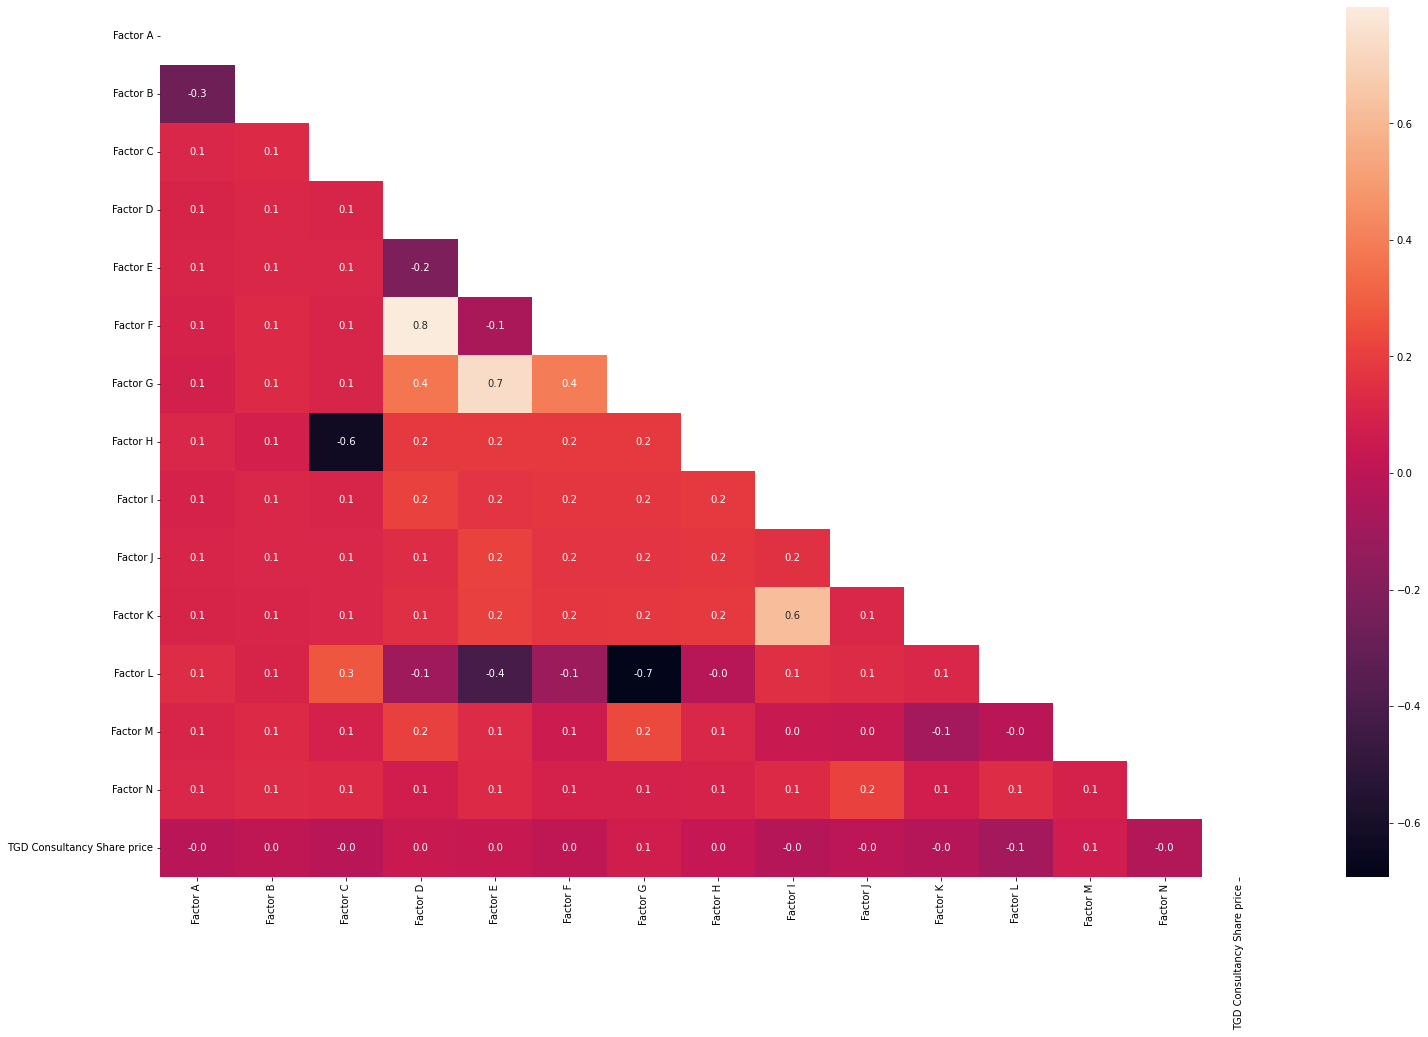

In [13]:
plt.figure(figsize=(25,16))
sns.heatmap(Train_Data_A.corr(method = 'spearman'), fmt = '.1f',  annot = True, mask = np.triu(Train_Data_A.corr()))

In [14]:
Train_Data_A = Train_Data_A.set_index('dates', append=False)

In [15]:
Train_Data_B = Train_Data_B.set_index('dates', append= False)

In [16]:
Train_Data_C = Train_Data_C.set_index('dates', append= False)

In [17]:
Train_Data_A.shape

(161768, 15)

In [18]:
Train_Data_A.head()

,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price
dates,,,,,,,,,,,,,,,
1700-01-01,502.52,498.78,493.98,947.6,505.24,79050,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519
1700-01-02,503.33,495.09,496.93,928.6,506.21,31082,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518
1700-01-03,500.62,493.71,504.75,935.5,505.51,19375,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523
1700-01-04,502.08,492.98,502.20,923.5,505.25,22010,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522
1700-01-05,502.81,493.23,499.57,918.1,504.86,26533,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522


# Seperating Feautres and Target Variable

In [19]:
X1 = Train_Data_A.iloc[:,0:14]
y1 = Train_Data_A.iloc[:,-1]

In [20]:
X1.head()

,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
dates,,,,,,,,,,,,,,
1700-01-01,502.52,498.78,493.98,947.6,505.24,79050,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94
1700-01-02,503.33,495.09,496.93,928.6,506.21,31082,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51
1700-01-03,500.62,493.71,504.75,935.5,505.51,19375,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00
1700-01-04,502.08,492.98,502.20,923.5,505.25,22010,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04
1700-01-05,502.81,493.23,499.57,918.1,504.86,26533,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10


In [21]:
y1

dates
1700-01-01             519
1700-01-02             518
1700-01-03             523
1700-01-04             522
1700-01-05             522
                      ... 
2142-11-23 00:00:00    498
2142-11-24 00:00:00    502
2142-11-25 00:00:00    508
2142-11-26 00:00:00    507
2142-11-27 00:00:00    499
Name: TGD Consultancy Share price, Length: 161768, dtype: int64

# Train Test Split

In [22]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train_A = scaler.fit_transform(X_train_A)
X_test_A = scaler.transform(X_test_A)

In [25]:
from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, IsolationForest
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

import time
from math import sqrt
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold


# Model Training & Model Testing

In [26]:
models = [['Linear Regression', LinearRegression()],['Lasso', Lasso()],['Ridge', Ridge()],['Random Forest',RandomForestRegressor()],
          ['Extra Tree Regressor',ExtraTreesRegressor()],['XG Boost',xgb.XGBRegressor()]]

# For TGD Consultancy Share price

In [27]:
model_data_A = []
for name,curr_model_A in models :
    curr_model_A.fit(X_train_A,y_train_A)
    curr_model_data_A = {}
    curr_model_data_A["Name"] = name
    curr_model_data_A["Train R2 Score"] = metrics.r2_score(y_train_A,curr_model_A.predict(X_train_A))
    curr_model_data_A["Validate R2 Score"] = metrics.r2_score(y_test_A,curr_model_A.predict(X_test_A))
    curr_model_data_A["Test RMSE Score"] = (mean_squared_error(y_test_A,curr_model_A.predict(X_test_A)))
    model_data_A.append(curr_model_data_A)

In [28]:
modelComparison_A = pd.DataFrame(model_data_A)
modelComparison_A = modelComparison_A.sort_values(by=['Train R2 Score', 'Validate R2 Score', 'Test RMSE Score'])
modelComparison_A

,Name,Train R2 Score,Validate R2 Score,Test RMSE Score
1,Lasso,0.000000,-0.000005,371.244225
2,Ridge,0.010452,0.014582,365.828978
0,Linear Regression,0.013447,0.016275,365.200371
5,XG Boost,0.506439,0.385042,228.298406
3,Random Forest,0.919856,0.652302,129.080046
4,Extra Tree Regressor,0.965975,0.670067,122.484988


By Comparing all the models (Linear Regression , Lasso, Ridge, Decision Tree Regressor, Extra Tree Regressor, XG Boost)
I found Extra Tree Regressor is the best model to predict as RMSE Score is 112.50309( Lower the RMSE, Better the Model)
and R2 Score is 0.66 (66%)

In [29]:
Test_Data_A = pd.read_excel("Test_Data.xlsx")
Test_Data_A.head()

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,2142-11-28,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
1,2142-11-29,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2,2142-11-30,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
3,2142-12-01,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
4,2142-12-02,503.94,497.55,499.63,894.7,502.82,94705,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44


In [30]:
Test_Data_A.shape

(30000, 15)

In [31]:
Test_Data_A = Test_Data_A.set_index('dates', append=False)

In [32]:
Test_Data_A.head()

,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
dates,,,,,,,,,,,,,,
2142-11-28,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2142-11-29,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2142-11-30,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2142-12-01,10499.99,10499.99,10499.99,100499.9,1499.99,10000500,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2142-12-02,503.94,497.55,499.63,894.7,502.82,94705,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44


In [33]:
Test_Data_A.shape

(30000, 14)

In [34]:
Final_Pred_A = ExtraTreesRegressor(n_estimators=200, max_depth=10)

In [35]:
Final_Pred_A.fit(X_train_A, y_train_A)

ExtraTreesRegressor(max_depth=10, n_estimators=200)

In [36]:
y_pred_A = Final_Pred_A.predict(Test_Data_A)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [37]:
y_pred_A

array([511.3278956, 511.3278956, 511.3278956, ..., 511.3278956,
       511.3278956, 511.3278956])

In [38]:
y_pred_A.to_("test_A.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_'

# For Automobiles Share Price

In [ ]:
X2 = Train_Data_B.iloc[:,0:14]
y2 = Train_Data_B.iloc[:,-1]

In [ ]:
X2.head()

In [ ]:
y2

In [ ]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_B = scaler.fit_transform(X_train_B)
X_test_B= scaler.transform(X_test_B)

In [ ]:
model_data_B = []
for name,curr_model_B in models :
    curr_model_B.fit(X_train_B,y_train_B)
    curr_model_data_B = {}
    curr_model_data_B["Name"] = name
    curr_model_data_B["Train R2 Score"] = metrics.r2_score(y_train_B,curr_model_B.predict(X_train_B))
    curr_model_data_B["Validate R2 Score"] = metrics.r2_score(y_test_B,curr_model_B.predict(X_test_B))
    curr_model_data_B["Test RMSE Score"] = (mean_squared_error(y_test_B,curr_model_B.predict(X_test_B)))
    model_data_B.append(curr_model_data_B)

In [ ]:
modelComparison_B = pd.DataFrame(model_data_B)
modelComparison_B = modelComparison_B.sort_values(by=['Train R2 Score', 'Validate R2 Score', 'Test RMSE Score'])
modelComparison_B

In [ ]:
Final_Pred_B = RandomForestRegressor(n_estimators=200, max_depth=10)

In [ ]:
Final_Pred_B.fit(X_train_B, y_train_B)

In [ ]:
y_pred_B = Final_Pred_B.predict(Test_Data_A)

In [ ]:
y_pred_B

# For Power Share price

In [ ]:
X3 = Train_Data_C.iloc[:,0:14]
y3 = Train_Data_C.iloc[:,-1]

In [ ]:
X3.head()

In [ ]:
y3

In [ ]:
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_C = scaler.fit_transform(X_train_C)
X_test_C= scaler.transform(X_test_C)

In [ ]:
model_data_C = []
for name,curr_model_C in models :
    curr_model_C.fit(X_train_C,y_train_C)
    curr_model_data_C = {}
    curr_model_data_C["Name"] = name
    curr_model_data_C["Train R2 Score"] = metrics.r2_score(y_train_C,curr_model_C.predict(X_train_C))
    curr_model_data_C["Validate R2 Score"] = metrics.r2_score(y_test_C,curr_model_C.predict(X_test_C))
    curr_model_data_C["Test RMSE Score"] = (mean_squared_error(y_test_C,curr_model_C.predict(X_test_C)))
    model_data_C.append(curr_model_data_C)

In [ ]:
modelComparison_C = pd.DataFrame(model_data_C)
modelComparison_C = modelComparison_C.sort_values(by=['Train R2 Score', 'Validate R2 Score', 'Test RMSE Score'])
modelComparison_C

In [ ]:
Final_Pred_C = RandomForestRegressor(n_estimators=200, max_depth=10)

In [ ]:
Final_Pred_C.fit(X_train_C,y_train_C)

In [ ]:
y_pred_C = Final_Pred_C.predict(Test_Data_A)

In [ ]:
y_pred_C

# Predictions for Test Dataset

In [ ]:
test_data = pd.read_excel("Test_Data.xlsx")

In [ ]:
dates = list(test_data['dates'])

In [ ]:
dates

In [ ]:
predictions = pd.DataFrame()
predictions

In [ ]:
predictions['Dates'] = dates
predictions['consultancy'] = y_pred_A
predictions['automobiles'] = y_pred_B
predictions['power'] = y_pred_C
predictions

In [ ]:
predictions.head()

In [ ]:
Xt = predictions.iloc[:,1:]

In [ ]:
Xt

In [ ]:
yt = predictions.iloc[:,0:1]

In [ ]:
yt

In [ ]:
plt.figure(figsize=(15,8))
plt.legend
plt.plot(yt, Xt)
plt.show()